In [136]:
#!/usr/bin/env python
# coding: utf-8

# In[22]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics
import pandas as pd
import dask.dataframe as ddf
import dask.multiprocessing
import warnings
from sklearn.preprocessing import LabelBinarizer




#export PYTHONIOENCODING = UTF-8
warnings.filterwarnings('ignore')


def read_data(file, **kwargs):
    """
    >>> read_data()
    Traceback (most recent call last):
    ...
    TypeError: read_data() missing 1 required positional argument: 'file'
    >>> read_data(abcd.csv)
    Traceback (most recent call last):
    ...
    NameError: name 'abcd' is not defined
    >>> read_data('abcd.csv')
    Traceback (most recent call last):
    ...
    FileNotFoundError: [Errno 2] File b'abcd.csv' does not exist: b'abcd.csv'

    >>> read_data('olym.csv')
    Traceback (most recent call last):
    ...
    UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 0: invalid start byte
    >>> read_data('athlete_events.csv' , columns = 'asd')
    Traceback (most recent call last):
    ...
    TypeError: parser_f() got an unexpected keyword argument 'columns'


    :param file: CSV Files
    :param kwargs:
    :return: Pandas Dataframe
    """
    filename = pd.read_csv(file, **kwargs)
    return filename

def read_data_df(file, **kwargs):
    """
    >>> read_data_df()
    Traceback (most recent call last):
    ...
    TypeError: read_data_df() missing 1 required positional argument: 'file'
    >>> read_data_df('unknown.csv')
    Traceback (most recent call last):
    ...
    FileNotFoundError: [Errno 2] No such file or directory: '/Users/rj/PycharmProjects/final_projects/unknown.csv'

    >>> read_data_df(unknown.csv)
    Traceback (most recent call last):
    ...
    NameError: name 'unknown' is not defined

    >>> read_data_df('olym.csv')
    Traceback (most recent call last):
    ...
    UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 0: invalid start byte
    >>> read_data_df('athlete_events.csv' , columns = 'asd')
    Traceback (most recent call last):
    ...
    TypeError: parser_f() got an unexpected keyword argument 'columns'



    :param file: Input CSV File
    :param kwargs: addtional arguments
    :return: Pandas Dataframe
    """
   # filename = pd.read_csv(file, **kwargs)
    df = ddf.read_csv(file,**kwargs, blocksize=1000000)
    df = df.compute(scheduler='processes')
    return df 


def get_shape(dataframe):
    """
    >>> get_shape()
    Traceback (most recent call last):
    ...
    TypeError: get_shape() missing 1 required positional argument: 'dataframe'


    >>> get_shape('unknown.dataframe')
    Traceback (most recent call last):
    ...
    AttributeError: 'str' object has no attribute 'shape'

    >>> get_shape(Pandasdataframe)
    Traceback (most recent call last):
    ...
    NameError: name 'Pandasdataframe' is not defined

    :param dataframe: Pandas Dataframe
    :return: Shape of the Dataframe
    """
    return dataframe.shape

def get_stats(dataframe):
    """
    >>> get_stats()
    Traceback (most recent call last):
    ...
    TypeError: get_stats() missing 1 required positional argument: 'dataframe'


    >>> get_stats('unknown.dataframe')
    Traceback (most recent call last):
    ...
    AttributeError: 'str' object has no attribute 'info'

    >>> get_stats(PandasDF)
    Traceback (most recent call last):
    ...
    NameError: name 'PandasDF' is not defined

    :param dataframe: Pandas Dataframe
    :return: Shape of the Dataframe

    :param dataframe: Pandas Dataframe
    :return: Information about the dataframe
    """
    return dataframe.info()

def get_missing_values(dataframe):
    """
    >>> get_missing_values()
    Traceback (most recent call last):
    ...
    TypeError: get_missing_values() missing 1 required positional argument: 'dataframe'


    >>> get_missing_values('unknown.dataframe')
    Traceback (most recent call last):
    ...
    AttributeError: 'str' object has no attribute 'isnull'

    >>> get_missing_values(df, unknown_argument , another )
    Traceback (most recent call last):
    ...
    NameError: name 'df' is not defined

    >>> get_missing_values(PandasDF)
    Traceback (most recent call last):
    ...
    NameError: name 'PandasDF' is not defined

    :param dataframe: Pandas Dataframe
    :return: Details of the missing values in the dataframe
    """
    return dataframe.isnull().sum()

def get_info(dataframe):
   # list(filter(None, test_list))
    """

    >>> get_info()
    Traceback (most recent call last):
    ...
    TypeError: get_info() missing 1 required positional argument: 'dataframe'


    >>> get_info('unknown.dataframe')
    Traceback (most recent call last):
    ...
    AttributeError: 'str' object has no attribute 'shape'

    >>> get_info(df, unknown_argument , another )
    Traceback (most recent call last):
    ...
    NameError: name 'df' is not defined

    >>> get_info(PandasDF)
    Traceback (most recent call last):
    ...
    NameError: name 'PandasDF' is not defined


   :param dataframe: Pandas Dataframe
   :return: Details of the Dataframe
   """
    columns =  list(filter(None,list(dataframe.columns.values)))
    #columns = [i for i in columns if i]
    names = str(columns)[1:-1]
    row, col = dataframe.shape
    print("\nThe Dataframe - has {} rows and {} columns".format(name,row,col))
    
    print("Column Names - {} \n".format(names))

In [137]:
world_gdp = read_data_df('world_gdp.csv', skiprows = 3)
noc_country = read_data_df('noc_regions.csv')
world_population = read_data_df('world_pop.csv')
olympics = read_data_df('athlete_events.csv') 
#olympics_host = read_data_df('olym.csv',encoding="ISO-8859–1")
olympics_host = read_data_df('olm2.csv')
world_hdi = read_data_df('hdi.csv')

In [138]:
print(get_shape(olympics))
print(get_shape(world_gdp))
print(get_shape(noc_country))
print(get_shape(world_population))
print(get_shape(olympics_host))

(271116, 15)
(219, 61)
(230, 3)
(217, 61)
(51, 7)


In [139]:
print(get_info(olympics))
print(get_info(world_gdp))
print(get_info(noc_country))
print(get_info(world_population))
print(get_info(olympics_host))

NameError: name 'name' is not defined

In [141]:
## Data Cleaning
### Missing Values 
get_missing_values(olympics)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [142]:
olympics['Medal'].fillna('No_Medal', inplace=True)

In [140]:
get_missing_values(olympics)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
3285,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
3286,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
3287,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
olympics['Medal'].fillna('No_Medal', inplace=True)

In [7]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No_Medal
3285,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No_Medal
3286,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No_Medal
3287,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No_Medal


In [8]:
noc_country.dtypes

NOC       object
region    object
notes     object
dtype: object

In [9]:
#"One Hot Encoding of Medals Column"

# #### https://www.datacamp.com/community/tutorials/categorical-data
# noc_country = noc_country.astype('|S')
# #noc_country= noc_country.astype(str)
# olympics_host[['Host City' , 'Country' , 'Summer (Olympiad)' , 'Winter']] = olympics_host[['Host City' , 'Country' , 'Summer (Olympiad)' , 'Winter']].astype('|S')
# #olympics_host= olympics_host.astype('str')


In [10]:
noc_country.dtypes

NOC       object
region    object
notes     object
dtype: object

In [11]:
olympics_host.dtypes

Host City             object
Country               object
Summer (Olympiad)     object
Winter                object
Year                   int64
latitude             float64
longitude            float64
dtype: object

In [12]:

#label_binarizer = LabelBinarizer()
#label_binarizer_results = label_binarizer.fit_transform(olympics['Medal'])
#lb_results_df = pd.DataFrame(label_binarizer_results, columns=label_binarizer.classes_)

#olympics = olympics.join(pd.DataFrame(label_binarizer.fit_transform(olympics["Medal"]),columns=label_binarizer.classes_ )).reset_index()
#olympics = olympics.join(pd.DataFrame(label_binarizer.fit_transform(olympics["Medal"]),columns=label_binarizer.classes_ )).reset_index()

#olympics = pd.merge(olympics, lb_results_df , how=left)


#tempdf = pd.get_dummies(olympics,columns='Me


olympics["Bronze_Medal"] = np.where(olympics["Medal"].str.contains("Bronze"), 1, 0)
olympics["Silver_Medal"] = np.where(olympics["Medal"].str.contains("Silver"), 1, 0)
olympics["Gold_Medal"] = np.where(olympics["Medal"].str.contains("Gold"), 1, 0)
olympics["No_Medal"] = np.where(olympics["Medal"].str.contains("No_Medal"), 1, 0)

world = world_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1)



olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,0,0,0,1
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,0,0,0,1
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,0,0,0,1
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No_Medal,0,0,0,1
3285,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No_Medal,0,0,0,1
3286,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No_Medal,0,0,0,1
3287,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No_Medal,0,0,0,1


In [13]:
#olympics.reset_index('ID',drop=True, inplace=True)

In [14]:
#olympics.set_index('ID',inplace=True)
olympics.set_index('ID',drop=True)


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal
ID,,,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,0,0,0,1
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,0,0,0,1
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,0,0,0,1
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,0
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No_Medal,0,0,0,1
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No_Medal,0,0,0,1
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No_Medal,0,0,0,1


In [15]:
olympics_NOC = olympics.merge(noc_country, left_on='NOC' , right_on='NOC' , how ='left' )

In [16]:
olympics_NOC

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,0,0,0,1,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,No_Medal,0,0,0,1,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,No_Medal,0,0,0,1,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,0,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal,0,0,0,1,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,...,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No_Medal,0,0,0,1,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No_Medal,0,0,0,1,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No_Medal,0,0,0,1,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,...,Nagano,Bobsleigh,Bobsleigh Men's Four,No_Medal,0,0,0,1,Poland,NaN


In [17]:
olympics_host['Year'].fillna(-999, inplace=True)
olympics_host['Winter'].fillna("No_Olympics", inplace=True)
olympics_host['Summer (Olympiad)'].fillna("No_Olympics", inplace=True)
olympic_years = list(olympics_host["Year"].unique())
olympic_years = [str(int(element)) for element in olympic_years]



world_population_columns = list(world_population.columns.values)[4:]
for item in world_population_columns:
    if item not in olympic_years:
        world_population.drop(item, axis=1, inplace=True)


In [18]:
olympics_NOC_population = olympics_NOC.merge(world_population, left_on='NOC' , right_on='Country Code' , how ='left' ).reset_index(drop=True)

In [19]:
olympics_NOC_population



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,1.241935e+09,1.262645e+09,1.280400e+09,1.296075e+09,1.311020e+09,1.324655e+09,1.337705e+09,1.350695e+09,1.364270e+09,1.378665e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,1.241935e+09,1.262645e+09,1.280400e+09,1.296075e+09,1.311020e+09,1.324655e+09,1.337705e+09,1.350695e+09,1.364270e+09,1.378665e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07


In [20]:

list(world_gdp.columns)

world_gdp_columns = list(world_gdp.columns.values)[4:]
for item in world_gdp_columns:
     if item not in olympic_years:
         world_gdp.drop(item, axis=1, inplace=True)
olympics_NOC_gdp = olympics_NOC.merge(world_population, left_on='NOC' , right_on='Country Code' , how ='left' ).reset_index(drop=True)
olympics_NOC_gdp

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,1.241935e+09,1.262645e+09,1.280400e+09,1.296075e+09,1.311020e+09,1.324655e+09,1.337705e+09,1.350695e+09,1.364270e+09,1.378665e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,1.241935e+09,1.262645e+09,1.280400e+09,1.296075e+09,1.311020e+09,1.324655e+09,1.337705e+09,1.350695e+09,1.364270e+09,1.378665e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,...,3.866348e+07,3.825863e+07,3.823036e+07,3.818222e+07,3.814127e+07,3.812576e+07,3.804279e+07,3.806316e+07,3.801174e+07,3.794802e+07


In [21]:
#### American Athletes in Olympics

In [22]:
olympics_NOC
olympics_NOC.shape

(271116, 21)

In [23]:

american_olympians = olympics_NOC.loc[(olympics_NOC.NOC=='USA') & (olympics_NOC.Medal=='Gold') & (olympics_NOC.Season=='Summer')]
american_olympians

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,...,Paris,Golf,Golf Women's Individual,Gold,0,0,1,0,USA,NaN
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,...,Sydney,Basketball,Basketball Men's Basketball,Gold,0,0,1,0,USA,NaN
710,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,...,Paris,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1,0,USA,NaN
711,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,...,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1,0,USA,NaN
739,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,...,Sydney,Baseball,Baseball Men's Baseball,Gold,0,0,1,0,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266319,133237,"Timothy R. ""Tim"" Young",M,26.0,172.0,77.0,United States,USA,2000 Summer,2000,...,Sydney,Baseball,Baseball Men's Baseball,Gold,0,0,1,0,USA,NaN
267204,133685,Mariel Leigh Zagunis,F,19.0,173.0,72.0,United States,USA,2004 Summer,2004,...,Athina,Fencing,"Fencing Women's Sabre, Individual",Gold,0,0,1,0,USA,NaN
267205,133685,Mariel Leigh Zagunis,F,23.0,173.0,72.0,United States,USA,2008 Summer,2008,...,Beijing,Fencing,"Fencing Women's Sabre, Individual",Gold,0,0,1,0,USA,NaN
269922,135045,Rbert Zimonyi,M,46.0,170.0,52.0,United States,USA,1964 Summer,1964,...,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1,0,USA,NaN


In [24]:
    pd.options.display.max_rows = 999
    #### We can see that the Gold medals won by America is 1127 , but the number os rows returned is 1951 . THis is due to medallists in team events being counted as individual medallists. Eg : - Soccer has 11 players , It will be counted as 11 medals instead of 1 .

In [25]:
gold_medals = olympics_NOC[olympics_NOC.Gold_Medal==1]
gold_medals 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,0,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,0,0,1,0,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,0,0,1,0,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,...,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,0,0,1,0,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,...,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,0,0,1,0,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,...,Athina,Judo,Judo Men's Middleweight,Gold,0,0,1,0,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,...,Athina,Hockey,Hockey Women's Hockey,Gold,0,0,1,0,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,...,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,0,0,1,0,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,...,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1,0,Netherlands,NaN


In [26]:
gold = gold_medals.groupby(['Event','Year'])['ID'].count()
gold

print(gold[gold>1])


Event                                          Year
Alpine Skiing Women's Downhill                 2014     2
Alpinism Mixed Alpinism                        1924    21
                                               1932     2
                                               1936     2
Archery Men's Pole Archery, Large Birds, Team  1920     6
                                                       ..
Water Polo Women's Water Polo                  2008    12
                                               2012    12
                                               2016    13
Weightlifting Men's Lightweight                1928     2
                                               1936     2
Name: ID, Length: 1607, dtype: int64


In [27]:
gold_medals['Event_Frequency'] = gold_medals.groupby(['Event','Year'])['ID'].transform('count')
gold = gold_medals[gold_medals.Event_Frequency > 1]
team_events = gold["Event"].unique()


In [28]:
team_events

array(["Tug-Of-War Men's Tug-Of-War", "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Pommelled Horse", "Handball Women's Handball",
       "Speed Skating Men's 1,500 metres", 'Sailing Mixed 8 metres',
       "Cycling Men's Road Race, Team",
       "Canoeing Men's Kayak Fours, 1,000 metres",
       "Handball Men's Handball", "Football Men's Football",
       "Water Polo Men's Water Polo",
       'Sailing Mixed Two Person Heavyweight Dinghy',
       "Rowing Men's Quadruple Sculls", "Rowing Men's Double Sculls",
       "Rowing Men's Coxed Pairs", "Hockey Men's Hockey",
       "Basketball Men's Basketball", "Nordic Combined Men's Team",
       "Ice Hockey Men's Ice Hockey", "Rowing Men's Coxed Eights",
       "Baseball Men's Baseball", "Athletics Men's 4 x 400 metres Relay",
       "Gymnastics Men's Team All-Around, Free System",
       "Gymnastics Men's Team All-Around, Swedish System",
       "Bobsleigh Men's Two", "Curling Men's Curling",
       "Cycling Men's Team Pursuit

In [29]:
## Medals Tally

In [30]:
olympics_NOC

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,0,0,0,1,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,No_Medal,0,0,0,1,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,No_Medal,0,0,0,1,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,0,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal,0,0,0,1,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,...,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No_Medal,0,0,0,1,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No_Medal,0,0,0,1,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No_Medal,0,0,0,1,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,...,Nagano,Bobsleigh,Bobsleigh Men's Four,No_Medal,0,0,0,1,Poland,NaN


In [31]:
tally = olympics_NOC[(olympics_NOC.No_Medal != 1) & (olympics_NOC.Season == "Summer")]

tally.columns


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region', 'notes'],
      dtype='object')

In [32]:
medal_tally = tally[[ 'NOC','Year', 'Sport', 'Event', 'Medal','Bronze_Medal','Silver_Medal', 'Gold_Medal']]

medal_tally_1 = medal_tally.drop_duplicates(['Medal','Event','Year'])
medal_tally_1

#medal_tally_2 = medal_tally_1.groupby(['Event','Year'])['ID'].count()

#print(medal_tally_2[medal_tally_2>1])

,NOC,Year,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal
3,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1
37,FIN,1920,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1,0,0
38,FIN,1920,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1,0,0
41,FIN,1948,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1,0,0
42,FIN,1948,Gymnastics,Gymnastics Men's Team All-Around,Gold,0,0,1
...,...,...,...,...,...,...,...,...
270986,RUS,2008,Tennis,Tennis Women's Singles,Bronze,1,0,0
271010,AUT,1924,Weightlifting,Weightlifting Men's Lightweight,Silver,0,1,0
271076,URS,1952,Athletics,Athletics Women's Shot Put,Gold,0,0,1
271078,URS,1956,Athletics,Athletics Women's Shot Put,Silver,0,1,0


In [33]:
#Gold Medallists of USA - 


In [34]:
medal_tally_1[(medal_tally_1['Medal']=='Gold') & (medal_tally_1['NOC']=='USA')]

,NOC,Year,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal
283,USA,1900,Golf,Golf Women's Individual,Gold,0,0,1
609,USA,2000,Basketball,Basketball Men's Basketball,Gold,0,0,1
710,USA,1900,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1
711,USA,1904,Rowing,Rowing Men's Coxed Eights,Gold,0,0,1
739,USA,2000,Baseball,Baseball Men's Baseball,Gold,0,0,1
...,...,...,...,...,...,...,...,...
266222,USA,1952,Athletics,Athletics Men's Javelin Throw,Gold,0,0,1
266270,USA,1992,Athletics,Athletics Men's 400 metres Hurdles,Gold,0,0,1
266293,USA,1932,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",Gold,0,0,1
267204,USA,2004,Fencing,"Fencing Women's Sabre, Individual",Gold,0,0,1


In [35]:
#Silver Medallists of USA - 

In [36]:
medal_tally_1[(medal_tally_1['Medal']=='Silver') & (medal_tally_1['NOC']=='USA')]

,NOC,Year,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal
186,USA,2004,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,0,1,0
286,USA,2008,Softball,Softball Women's Softball,Silver,0,1,0
311,USA,2004,Taekwondo,Taekwondo Women's Featherweight,Silver,0,1,0
1450,USA,1912,Athletics,Athletics Men's Standing High Jump,Silver,0,1,0
1462,USA,1904,Swimming,Swimming Men's Plunge For Distance,Silver,0,1,0
1512,USA,1912,Athletics,Athletics Men's Standing Long Jump,Silver,0,1,0
1845,USA,2012,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver,0,1,0
2352,USA,2008,Volleyball,Volleyball Women's Volleyball,Silver,0,1,0
2467,USA,1992,Swimming,Swimming Women's 100 metres Butterfly,Silver,0,1,0
3021,USA,2012,Volleyball,Volleyball Women's Volleyball,Silver,0,1,0


In [37]:
#Bronze Medal Tally of USA - 

In [38]:
medal_tally_1[(medal_tally_1['Medal']=='Bronze') & (medal_tally_1['NOC']=='USA')].shape

(678, 8)

In [39]:
medal_tally_1.columns

Index(['NOC', 'Year', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal'],
      dtype='object')

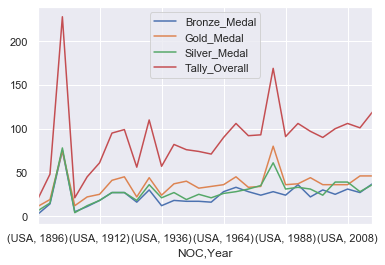

In [40]:
medal_tally_1['Tally_Overall'] = medal_tally_1['Bronze_Medal'].astype(int)+medal_tally_1['Silver_Medal'].astype(int)+medal_tally_1['Gold_Medal'].astype(int)
sns.set()
medal_tally_usa = medal_tally_1[medal_tally_1['NOC']=='USA']
medal_tally_usa=pd.pivot_table(medal_tally_usa, index=['NOC','Year'],values=['Bronze_Medal','Silver_Medal','Gold_Medal','Tally_Overall'],aggfunc=np.sum)
medal_tally_usa.plot()




In [41]:
medal_tally_usa.sort_values('Tally_Overall',ascending=False)


Bronze_Medal  Gold_Medal  Silver_Medal  Tally_Overall
NOC Year                                                       
USA 1904            75          75            78            228
    1984            28          80            61            169
    2016            37          46            36            119
    1932            30          44            36            110
    2008            31          36            39            106
    1968            33          45            28            106
    1992            36          37            33            106
    2012            27          46            28            101
    2004            25          36            39            100
    1924            27          45            27             99
    1996            22          44            31             97
    1920            27          41            27             95
    1976            24          34            35             93
    1972            28          33            31             92
    1988            24          36            31             91
    2000            30          36            24             90
    1964            28          36            26             90
    1948            18          37            27             82
    1952            17          40            19             76
    1956            17          32            25             74
    1960            16          34            21             71
    1912            18          25            18             61
    1936            12          24            21             57
    1928            16          22            18             56
    1900            14          19            15             48
    1908            11          22            12             45
    1906             5          12             4             21
    1896             2          11             6             19

In [42]:

#medal_tally_1['Tally_Overall'] = medal_tally_1['Bronze_Medal'].astype(int)+medal_tally_1['Silver_Medal'].astype(int)+medal_tally_1['Gold_Medal'].astype(int)
#medal_tally_1= medal_tally_1[[ 'NOC','Year', 'Medal','Bronze_Medal','Silver_Medal', 'Gold_Medal','Medal_tally']]
medal_tally_1



,NOC,Year,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,Tally_Overall
3,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,1
37,FIN,1920,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1,0,0,1
38,FIN,1920,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1,0,0,1
41,FIN,1948,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1,0,0,1
42,FIN,1948,Gymnastics,Gymnastics Men's Team All-Around,Gold,0,0,1,1
...,...,...,...,...,...,...,...,...,...
270986,RUS,2008,Tennis,Tennis Women's Singles,Bronze,1,0,0,1
271010,AUT,1924,Weightlifting,Weightlifting Men's Lightweight,Silver,0,1,0,1
271076,URS,1952,Athletics,Athletics Women's Shot Put,Gold,0,0,1,1
271078,URS,1956,Athletics,Athletics Women's Shot Put,Silver,0,1,0,1


In [43]:
medal_tally_by_year=pd.pivot_table(medal_tally_1, index=['NOC','Year'],values=['Bronze_Medal','Silver_Medal','Gold_Medal','Tally_Overall'],aggfunc=np.sum)

medal_tally_by_year.sort_values('Tally_Overall',ascending=False)

Bronze_Medal  Gold_Medal  Silver_Medal  Tally_Overall
NOC Year                                                       
USA 1904            75          75            78            228
URS 1980            43          79            68            190
USA 1984            28          80            61            169
GBR 1908            36          56            49            141
URS 1988            41          53            31            125
...                ...         ...           ...            ...
POR 1936             1           0             0              1
    1928             1           0             0              1
    1924             1           0             0              1
GAB 2012             0           0             1              1
AHO 1988             0           0             1              1

[1243 rows x 4 columns]

In [44]:
medal_tally_overall=pd.pivot_table(medal_tally_1, index=['NOC'],values=['Bronze_Medal','Silver_Medal','Gold_Medal','Tally_Overall'],aggfunc=np.sum)
m = medal_tally_overall.sort_values('Tally_Overall',ascending=False)
m

,Bronze_Medal,Gold_Medal,Silver_Medal,Tally_Overall
NOC,,,,
USA,678,1028,796,2502
URS,270,385,311,966
GBR,276,275,312,863
GER,257,229,259,745
FRA,259,233,248,740
ITA,189,218,191,598
CHN,138,226,160,524
SWE,180,148,172,500
AUS,187,145,167,499


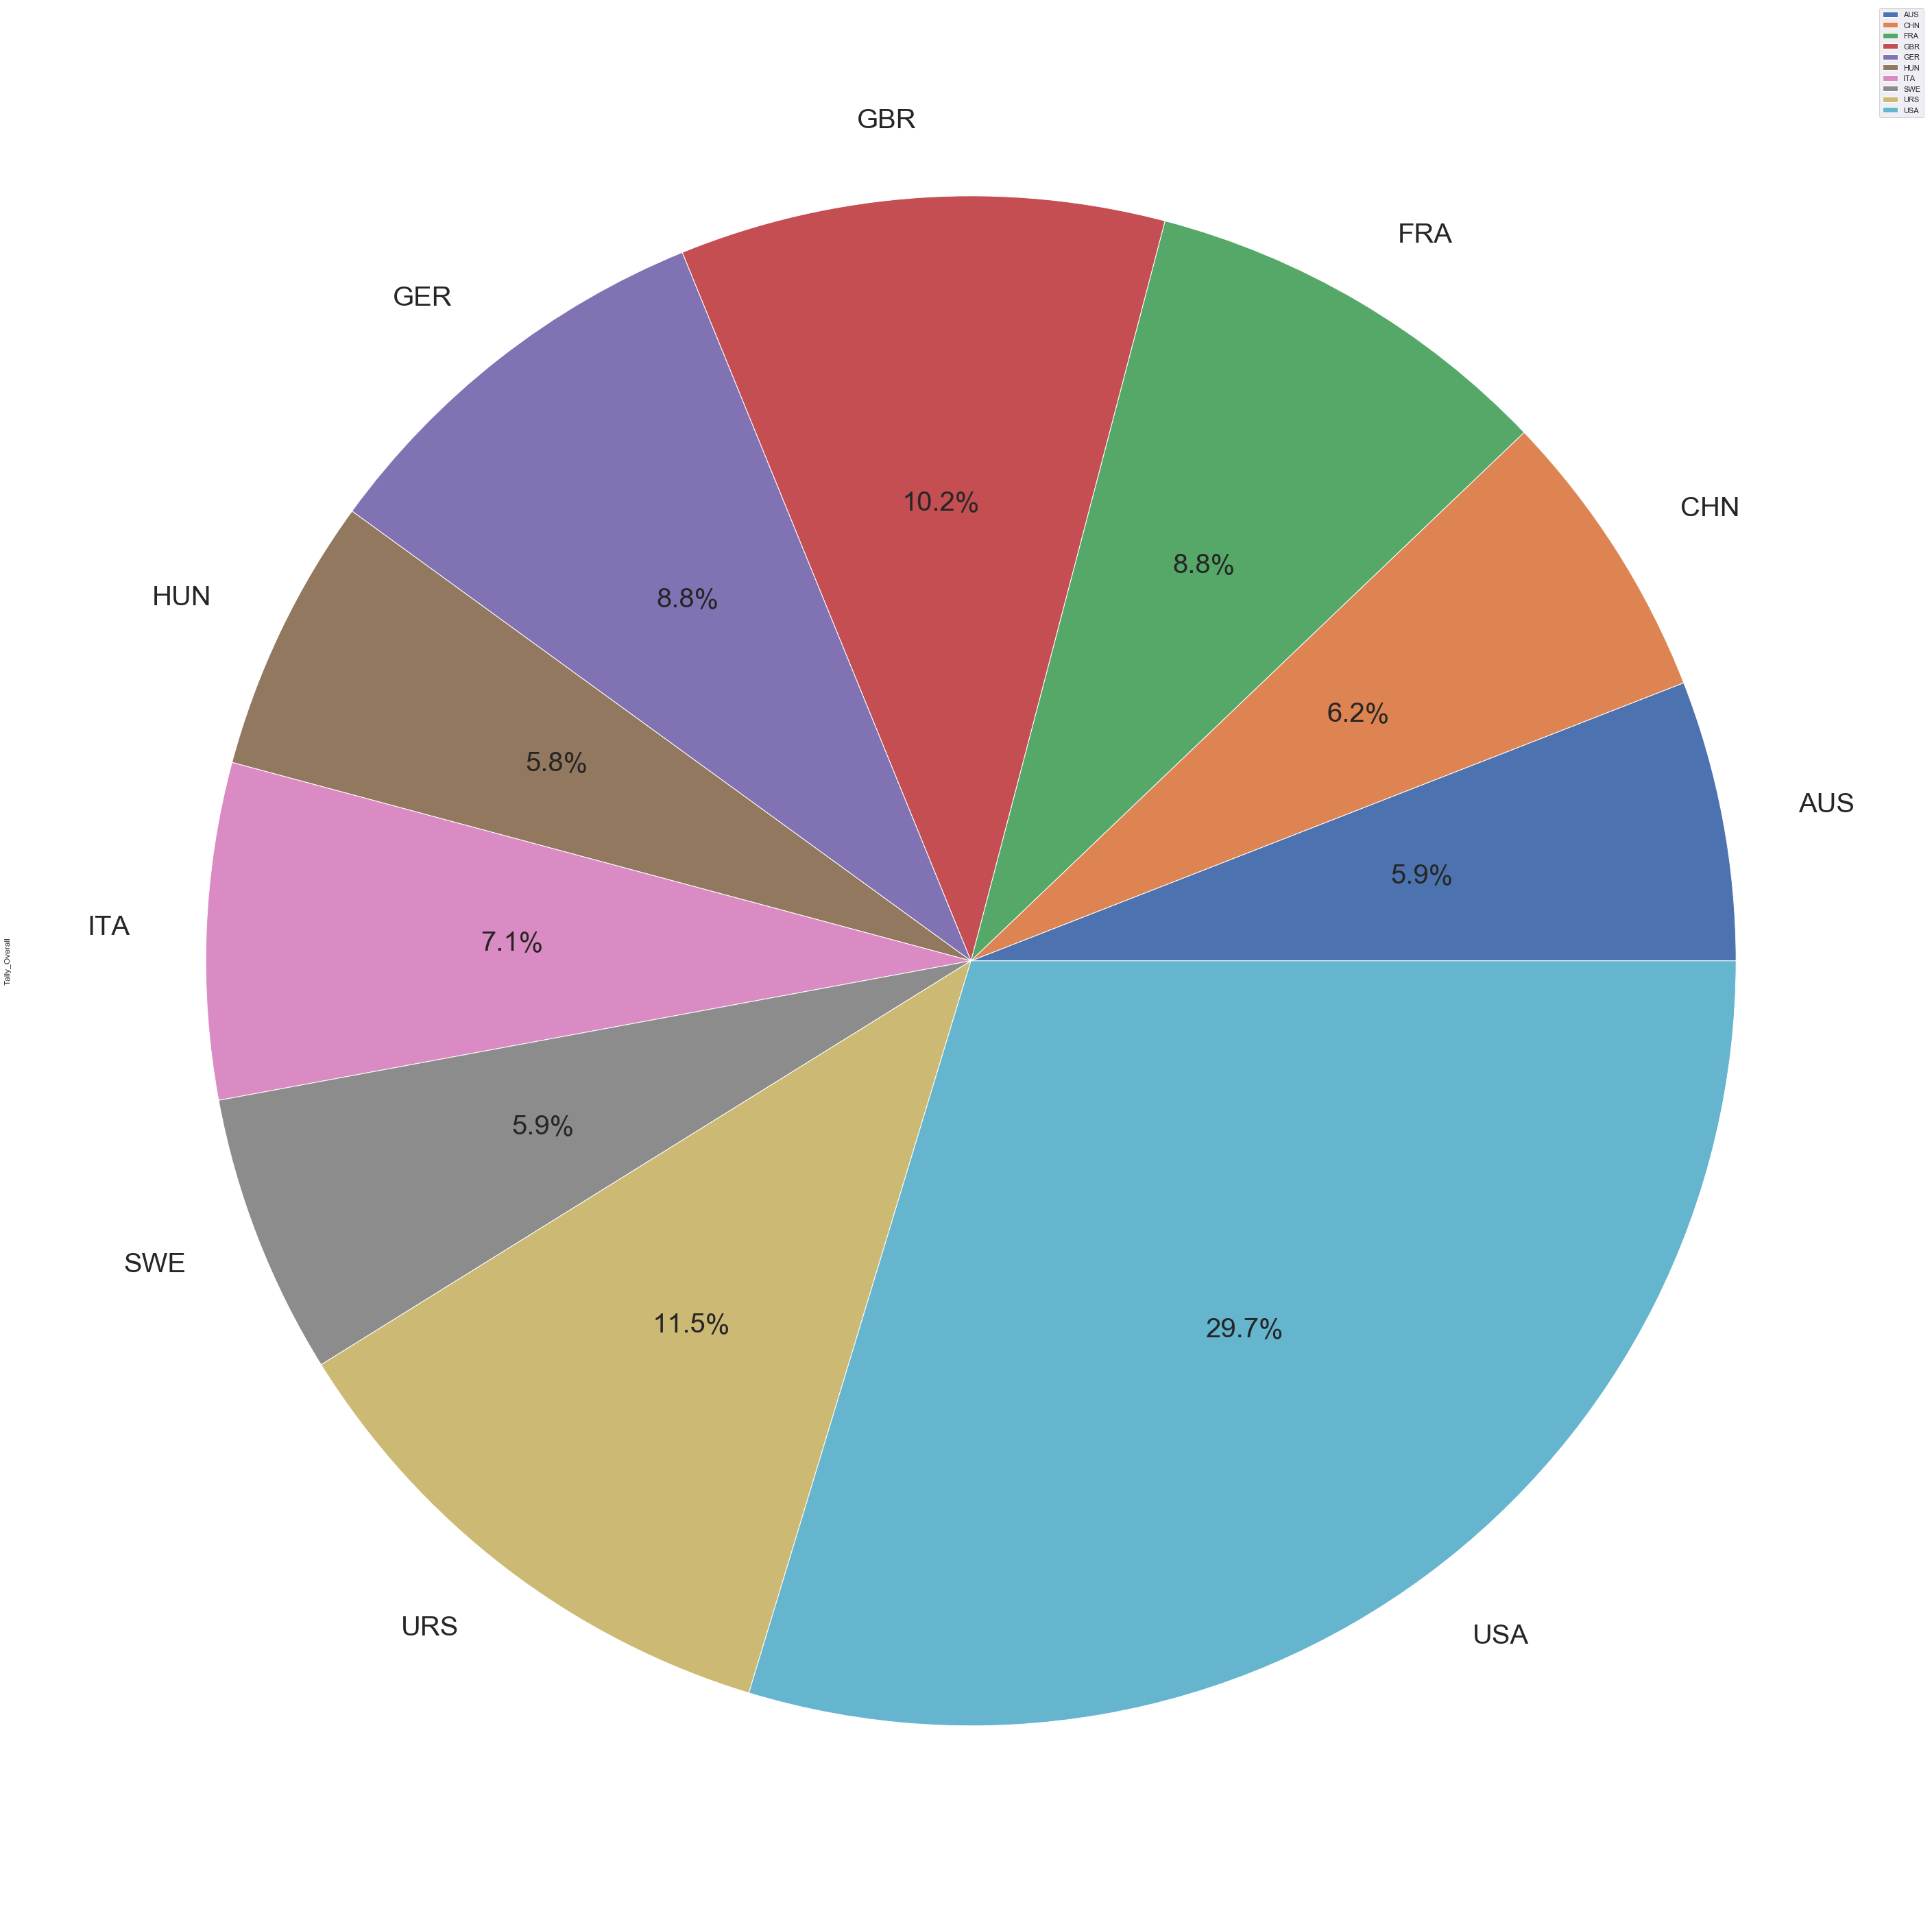

In [45]:
sns.set()



medal_tally_overall=pd.pivot_table(m.head(10), index=['NOC'],values=['Tally_Overall'],aggfunc=np.sum).plot(kind='pie',subplots=True,figsize=(50,100),
       autopct='%1.1f%%',textprops={'fontsize': 40})

 
#medal_tally_overall.sort_values('Tally_Overall',ascending=False)
#plt.rc('axes', labelsize=12)
#plt.figure(figsize=(50,1))



In [46]:
olympics_host

,Host City,Country,Summer (Olympiad),Winter,Year,latitude,longitude
0,Athens,Greece,I,No_Olympics,1896,37.983333,23.733334
1,Paris,France,II,No_Olympics,1900,48.853410,2.348800
2,St. Louis,USA,III,No_Olympics,1904,38.627273,-90.197891
3,London,UK,IV,No_Olympics,1908,51.508415,-0.125533
4,Stockholm,Sweden,V,No_Olympics,1912,59.332577,18.064903
5,Antwerp,Belgium,VII,No_Olympics,1920,51.216667,4.416666
6,Chamonix,France,No_Olympics,I,1924,45.923700,6.869400
7,Paris,France,VIII,No_Olympics,1924,48.853410,2.348800
8,St. Moritz,Switzerland,No_Olympics,II,1928,46.490800,9.835500
9,Amsterdam,Netherlands,IX,No_Olympics,1928,52.307500,4.972222


In [47]:
olympic_host_noc= olympics_host.merge(noc_country, left_on='Country' , right_on=u'region' , how ='left' )

olympic_host_noc = olympic_host_noc.drop_duplicates(['Country','Year','Summer (Olympiad)'])
olympic_host_noc = olympic_host_noc.drop_duplicates(['Country','Year','Winter'])
olympic_host_noc = olympic_host_noc.drop_duplicates(['Country','Year'] , keep='last')
olympic_host_noc = olympic_host_noc[['Year', 'NOC']]
olympic_host_noc.columns = ['Year_of_Hosting', 'Host_Country_code']
olympic_host_noc

,Year_of_Hosting,Host_Country_code
0,1896,CRT
2,1900,FRA
3,1904,USA
4,1908,GBR
5,1912,SWE
6,1920,BEL
8,1924,FRA
9,1928,SUI
10,1928,NED
12,1932,USA


In [48]:
olympic_host_noc.columns

Index(['Year_of_Hosting', 'Host_Country_code'], dtype='object')

In [49]:
olympics_NOC.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region', 'notes'],
      dtype='object')

In [50]:
#home = olympicsmerge(olympic_host_noc, left_on='NOC' , right_on='NOC' , how ='left' )

In [51]:
#home = home.drop_duplicates(['Name','Year','Event'])
#home

In [52]:
type(medal_tally_by_year)
medal_tally_by_year.reset_index(inplace=True)
medal_tally_by_year.columns

Index(['NOC', 'Year', 'Bronze_Medal', 'Gold_Medal', 'Silver_Medal',
       'Tally_Overall'],
      dtype='object')

In [53]:
medal_tally_by_year = medal_tally_by_year[['NOC', 'Year','Tally_Overall']]

medal_tally_by_year



,NOC,Year,Tally_Overall
0,AHO,1988,1
1,ALG,1992,1
2,ALG,1996,3
3,ALG,2000,5
4,ALG,2008,2
...,...,...,...
1238,YUG,1988,11
1239,ZAM,1996,1
1240,ZIM,1980,1
1241,ZIM,2004,3


In [54]:
total_medals = medal_tally_by_year[['NOC','Year','Tally_Overall']]

In [55]:
olympics_NOC.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region', 'notes'],
      dtype='object')

In [56]:
total_medals['Tally_Overall']

0        1
1        1
2        3
3        5
4        2
        ..
1238    11
1239     1
1240     1
1241     3
1242     4
Name: Tally_Overall, Length: 1243, dtype: int64

In [115]:
total_medals['Tally_Overall'].shape[0]

1243

In [123]:
#total_medals['Previous_Year_Tally'] = total_medals['Tally_Overall'].shift(1)

from numba import jit
#https://stackoverflow.com/questions/34855859/is-there-a-way-in-pandas-to-use-previous-row-value-in-dataframe-apply-when-previ

@jit
def previous_year(tally):
    new_tally = np.empty(tally.shape)
    new_tally[0] =0
    for i in range(1, new_tally.shape[0]):
        new_tally[i] = tally[i-1]
    return new_tally

def next_year(tally):
    new_tally = np.empty(tally.shape)
    new_tally[tally.shape[0]-1] =0
    for i in range(0, new_tally.shape[0]-1):
        new_tally[i] = tally[i+1]
    return new_tally

total_medals['Previous_Year_Tally'] = previous_year(total_medals['Tally_Overall'])
total_medals['Next_Year_Tally'] = next_year(total_medals['Tally_Overall'])







In [124]:
total_medals

,NOC,Year,Tally_Overall,Previous_Year_Tally,Next_Year_Tally
0,AHO,1988,1,0.0,1.0
1,ALG,1992,1,1.0,3.0
2,ALG,1996,3,1.0,5.0
3,ALG,2000,5,3.0,2.0
4,ALG,2008,2,5.0,1.0
...,...,...,...,...,...
1238,YUG,1988,11,17.0,1.0
1239,ZAM,1996,1,11.0,1.0
1240,ZIM,1980,1,1.0,3.0
1241,ZIM,2004,3,1.0,4.0


In [59]:
olympic_host_noc.columns


Index(['Year_of_Hosting', 'Host_Country_code'], dtype='object')

In [125]:
host_country_tally = olympic_host_noc.merge(total_medals , left_on = [ 'Host_Country_code','Year_of_Hosting'] 
                                           , right_on =['NOC', 'Year'] , how = 'left' )

In [126]:
host_country_tally.columns

Index(['Year_of_Hosting', 'Host_Country_code', 'NOC', 'Year', 'Tally_Overall',
       'Previous_Year_Tally', 'Next_Year_Tally'],
      dtype='object')

In [130]:
host = host_country_tally.dropna()
host

host=host[['Year_of_Hosting', 'Host_Country_code','Previous_Year_Tally', 'Tally_Overall', 'Next_Year_Tally']]
host

,Year_of_Hosting,Host_Country_code,Previous_Year_Tally,Tally_Overall,Next_Year_Tally
1,1900,FRA,11.0,95.0,2.0
2,1904,USA,48.0,228.0,21.0
3,1908,GBR,25.0,141.0,41.0
4,1912,SWE,24.0,63.0,63.0
5,1920,BEL,6.0,40.0,13.0
6,1924,FRA,42.0,38.0,25.0
7,1928,SUI,25.0,17.0,1.0
8,1928,NED,11.0,23.0,8.0
9,1932,USA,56.0,110.0,57.0
11,1948,SUI,17.0,22.0,13.0


In [63]:
olympics[((olympics.Year==2002) & (olympics.Team=='United States'))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze_Medal,Silver_Medal,Gold_Medal,No_Medal
4098,2361,Alan Jacob Alborn,M,21.0,178.0,61.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",No_Medal,0,0,0,1
4099,2361,Alan Jacob Alborn,M,21.0,178.0,61.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No_Medal,0,0,0,1
4100,2361,Alan Jacob Alborn,M,21.0,178.0,61.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No_Medal,0,0,0,1
6214,3491,"Anthony Lewis ""Tony"" Amonte",M,31.0,183.0,91.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver,0,1,0,0
5919,6841,Shannon Deanne Bahrke,F,21.0,162.0,55.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Freestyle Skiing,Freestyle Skiing Women's Moguls,Silver,0,1,0,0
6007,6887,"Christina ""Chris"" Bailey",F,30.0,167.0,73.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Women's Ice Hockey,Silver,0,1,0,0
6270,7022,Laurie Baker (-Mutch),F,25.0,170.0,61.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Women's Ice Hockey,Silver,0,1,0,0
1254,7801,"Donald Francis ""Don"" Barcombe, Jr.",M,43.0,178.0,90.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Curling,Curling Men's Curling,No_Medal,0,0,0,1
1677,8050,"Thomas Patrick ""Tom"" Barrasso",M,36.0,190.0,95.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver,0,1,0,0
2771,8621,Ann E. Battelle (-Ayad),F,34.0,175.0,73.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Freestyle Skiing,Freestyle Skiing Women's Moguls,No_Medal,0,0,0,1


In [64]:
medal_tally_by_year

,NOC,Year,Tally_Overall
0,AHO,1988,1
1,ALG,1992,1
2,ALG,1996,3
3,ALG,2000,5
4,ALG,2008,2
...,...,...,...
1238,YUG,1988,11
1239,ZAM,1996,1
1240,ZIM,1980,1
1241,ZIM,2004,3


In [65]:
predictor = medal_tally_by_year

In [66]:
olympics_NOC_gdp.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region', 'notes', 'Country',
       'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1964',
       '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1994', '1996',
       '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014',
       '2016'],
      dtype='object')

In [67]:
gdp = olympics_NOC_gdp.drop_duplicates(['Country','Year'])

In [68]:
gdp.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region', 'notes', 'Country',
       'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1964',
       '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1994', '1996',
       '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014',
       '2016'],
      dtype='object')

In [69]:
gdp =  gdp.drop(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Bronze_Medal',
       'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region', 'notes', 'Country',
       'Country Code', 'Indicator Name', 'Indicator Code'],axis=1)

#predictor['Population']= g[(predictor['Year']==g['Year']) & (predictor['NOC']== g['NOC'])]['Team']

In [70]:
gdp.dropna(inplace=True)


In [71]:
#gdp['Population'] = str(list(gdp['Year'].values))

In [72]:
#gdp.columns[gdp.isin([2016]).any()]

In [73]:
gdp = gdp[gdp.Year>=1960]

In [74]:
#pivot_gdp=pd.pivot_table(gdp, index=['Year','NOC'])

pivot_gdp = pd.melt(world, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP') #inspired
pivot_gdp.dropna(inplace=True)

In [75]:

pivot_gdp = pd.melt(world, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP') #inspired
pivot_gdp.dropna()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
2,Algeria,DZA,1960,2.723649e+09
10,Australia,AUS,1960,1.859335e+10
11,Austria,AUT,1960,6.592694e+09
13,Bahamas,BHS,1960,1.698039e+08
...,...,...,...,...
12477,Vietnam,VNM,2016,2.052760e+11
12479,Palestine,PSE,2016,1.339710e+10
12480,Yemen,YEM,2016,2.731761e+10
12481,Zambia,ZMB,2016,2.106399e+10


In [76]:
pop = world_population.drop(world_population.columns[[2, 3]], axis=1)

pivot_pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population') #inspired
pivot_pop

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
4552,Kosovo,XKX,2016,1816200.0
4553,"Yemen, Rep.",YEM,2016,27584213.0
4554,South Africa,ZAF,2016,55908865.0
4555,Zambia,ZMB,2016,16591390.0


In [77]:
# predictor['Year'] = predictor['Year'].astype(float)
# pivot_gdp['Year'] = pivot_gdp['Year'].astype(float)
# predictor['NOC'] = predictor['NOC'].astype(str)
# pivot_gdp['Country Code'] = pivot_gdp['Country Code'].astype(str)

# predictor.NOC = predictor.NOC.str.strip()
# pivot_gdp['Country Code'] = pivot_gdp['Country Code'].str.strip()


# predictor_gdp = pd.merge(predictor , pivot_gdp, left_on=['NOC' , 'Year'] , right_on = ['Country Code' , 'Year'] , how='left')

In [78]:
gdp_pop = pivot_gdp.merge(pivot_pop,left_on =['Country Code' , 'Year'],right_on = ['Country Code' , 'Year'] , how='left' )

In [79]:
gdp_pop.drop_duplicates(['Country Code', 'Year' ])
gdp_pop.dropna(inplace=True)

gdp_pop = gdp_pop[['Country Name' , 'Country Code' , 'Year' , 'GDP' , 'Population']]
gdp_pop

,Country Name,Country Code,Year,GDP,Population
0,Afghanistan,AFG,1960,5.377778e+08,8996351.0
2,Algeria,DZA,1960,2.723649e+09,11124888.0
10,Australia,AUS,1960,1.859335e+10,10276477.0
11,Austria,AUT,1960,6.592694e+09,7047539.0
13,Bahamas,BHS,1960,1.698039e+08,109528.0
...,...,...,...,...,...
12477,Vietnam,VNM,2016,2.052760e+11,92701100.0
12479,Palestine,PSE,2016,1.339710e+10,4551566.0
12480,Yemen,YEM,2016,2.731761e+10,27584213.0
12481,Zambia,ZMB,2016,2.106399e+10,16591390.0


In [80]:
predictor['Year'] = predictor['Year'].astype('str')
pred = gdp_pop.merge(predictor, left_on =['Country Code', 'Year'] , right_on = ['NOC' , 'Year'] , how ='left' )

In [81]:

predictor['Year'] = predictor['Year'].astype('str')
pred.dropna()
#predictor['Year'] = predictor['Year'].astype('str') 

,Country Name,Country Code,Year,GDP,Population,NOC,Tally_Overall
2,Australia,AUS,1960,1.859335e+10,1.027648e+07,AUS,21.0
3,Austria,AUT,1960,6.592694e+09,7.047539e+06,AUT,2.0
6,Belgium,BEL,1960,1.165872e+10,9.153489e+06,BEL,4.0
12,Brazil,BRA,1960,1.516557e+10,7.220755e+07,BRA,2.0
17,Canada,CAN,1960,4.109345e+10,1.790901e+07,CAN,1.0
32,Finland,FIN,1960,5.224102e+09,4.429634e+06,FIN,5.0
33,France,FRA,1960,6.265147e+10,4.681424e+07,FRA,5.0
35,Ghana,GHA,1960,1.217230e+09,6.652287e+06,GHA,1.0
42,India,IND,1960,3.653593e+10,4.494806e+08,IND,1.0
44,Iraq,IRQ,1960,1.684122e+09,7.289761e+06,IRQ,1.0


In [82]:
pred['Per_Capita_GDP'] = pred['GDP']/pred['Population']

In [83]:
pred.dropna(inplace=True)

In [84]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#due to highly skewed nature of data, we need to use logarthmic transformation to achieve better accuracy (https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c)
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
A = pred[['GDP', 'Population' , 'Per_Capita_GDP']]
A = scaler.fit_transform(A)
B = pred['Tally_Overall']





#test = reg.fit(A,B_train)


#B, A = dmatrices('Tally_Overall ~ log_GDP+log_Population+Per_Capita_GDP',data=pred,return_type = 'dataframe')

model = sm.OLS(B, A)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:          Tally_Overall   R-squared (uncentered):                   0.559
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              237.2
Date:                Thu, 02 Jan 2020   Prob (F-statistic):                    2.38e-99
Time:                        12:05:21   Log-Likelihood:                         -2354.0
No. Observations:                 564   AIC:                                      4714.
Df Residuals:                     561   BIC:                                      4727.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [85]:

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100)
reg.fit(A, B)

print("Random Forest Regression : {:.2f}".format(reg.score(A, B)))
B_predict = reg.predict(A)

rmse = np.sqrt(metrics.mean_squared_error(B, B_predict))

rmse = np.sqrt(metrics.mean_squared_error(B, B_predict))
rmse

Random Forest Regression : 0.94


4.919047542299653

In [86]:
world_hdi.dropna(inplace=True)

In [87]:
pivot_hdi = pd.melt(world_hdi, id_vars = ['HDI'], value_name = 'Human_Dev_Index') #inspired
pivot_hdi.dropna(inplace=True)
pivot_hdi_noc = pivot_hdi.merge(noc_country , left_on ='HDI' , right_on='region' , how='left' ) 

In [88]:
noc_country.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [89]:
pivot_hdi_noc.drop_duplicates(['variable','region','HDI'],keep='last')

pivot_hdi_noc = pivot_hdi_noc[['NOC', 'variable' , 'Human_Dev_Index' ,'HDI' ]]
pivot_hdi_noc.dropna(inplace=True)

In [90]:
pivot_hdi_noc.columns = ['NOC_HDI','Year_HDI', 'Human_Dev_Index' ,'Country_HDI' ]

In [91]:
pivot_hdi_noc

,NOC_HDI,Year_HDI,Human_Dev_Index,Country_HDI
0,AFG,1980,0.198,Afghanistan
1,ALG,1980,0.454,Algeria
2,ARG,1980,0.669,Argentina
3,ANZ,1980,0.850,Australia
4,AUS,1980,0.850,Australia
5,AUT,1980,0.740,Austria
6,BRN,1980,0.651,Bahrain
7,BAN,1980,0.303,Bangladesh
8,BEL,1980,0.757,Belgium
9,BIZ,1980,0.619,Belize


In [92]:
pre = pred.merge(pivot_hdi_noc , left_on=['Country Name' ,'Year'] , right_on = ['Country_HDI','Year_HDI'] ,how='left' )
pre.dropna(inplace=True)


MinMax = preprocessing.MinMaxScaler()
A = pre[['GDP', 'Population' , 'Per_Capita_GDP','Human_Dev_Index']]
A = MinMax.fit_transform(A)
B = pre['Tally_Overall']
reg = RandomForestRegressor(n_estimators=100)
reg.fit(A, B)
model = sm.OLS(B, A)
results = model.fit()
print(results.summary())
print("Random Forest Regression : {:.2f}".format(reg.score(A, B)))
B_predict = reg.predict(A)

rmse = np.sqrt(metrics.mean_squared_error(B, B_predict))

rmse = np.sqrt(metrics.mean_squared_error(B, B_predict))
rmse


                                 OLS Regression Results                                
Dep. Variable:          Tally_Overall   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              46.44
Date:                Thu, 02 Jan 2020   Prob (F-statistic):                    2.50e-20
Time:                        12:05:22   Log-Likelihood:                         -342.70
No. Observations:                  86   AIC:                                      693.4
Df Residuals:                      82   BIC:                                      703.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

3.9882293384174834

In [93]:
pre.shape

(86, 12)

In [94]:
#Running a random forest Regressor

In [95]:
pred.dtypes

Country Name       object
Country Code       object
Year               object
GDP               float64
Population        float64
NOC                object
Tally_Overall     float64
Per_Capita_GDP    float64
dtype: object

In [96]:
corr = pre.corr()
corr.style.background_gradient(cmap='coolwarm')

,GDP,Population,Tally_Overall,Per_Capita_GDP,Human_Dev_Index
GDP,1,0.457163,0.642159,0.193817,0.169667
Population,0.457163,1,0.571119,-0.27975,-0.395806
Tally_Overall,0.642159,0.571119,1,0.0403584,0.132623
Per_Capita_GDP,0.193817,-0.27975,0.0403584,1,0.751846
Human_Dev_Index,0.169667,-0.395806,0.132623,0.751846,1


In [97]:
corr

,GDP,Population,Tally_Overall,Per_Capita_GDP,Human_Dev_Index
GDP,1.000000,0.457163,0.642159,0.193817,0.169667
Population,0.457163,1.000000,0.571119,-0.279750,-0.395806
Tally_Overall,0.642159,0.571119,1.000000,0.040358,0.132623
Per_Capita_GDP,0.193817,-0.279750,0.040358,1.000000,0.751846
Human_Dev_Index,0.169667,-0.395806,0.132623,0.751846,1.000000


In [98]:
olympics_NOC
historical = olympics_NOC.dropna(subset=['Height','Weight']).reset_index()

In [99]:
historical.columns

Index(['index', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal',
       'Bronze_Medal', 'Silver_Medal', 'Gold_Medal', 'No_Medal', 'region',
       'notes'],
      dtype='object')

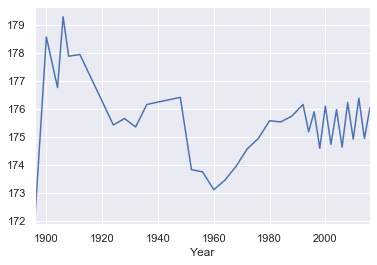

In [100]:
history_height_mean = historical.groupby(['Year'])['Height'].mean()
history_height_mean.plot()


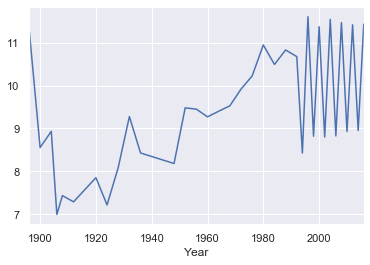

In [101]:
history_height_std = historical.groupby(['Year'])['Height'].std()
history_height_std.plot()

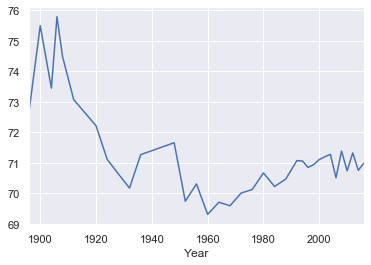

In [102]:
history_weight_mean = historical.groupby(['Year'])['Weight'].mean()
history_weight_mean.plot()


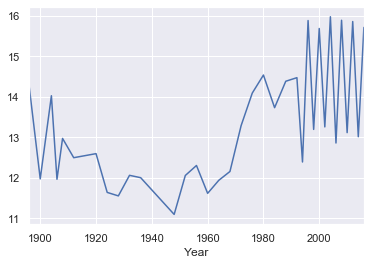

In [103]:
history_weight_std = historical.groupby(['Year'])['Weight'].std()
history_weight_std.plot()


In [104]:
#interesting Stat - 

#how far were the cities that hosted Olympics Each Year?

from pygeodesy.ellipsoidalVincenty import LatLon
from pygeodesy.utily import m2km
@jit
def getroutedistance(host_latitude, host_longitude) :
      latitude = list(host_latitude)
      longitude = list(host_longitude)
      distance = []
      distance.append(0)
      for i in range(0,len(latitude)-1):
           # print(latitude[i], longitude[i],latitude[i+1], longitude[i+1])
            source = LatLon(latitude[i], longitude[i])
            destination = LatLon(latitude[i+1], longitude[i+1]) 
            distance.append(m2km(source.distanceTo(destination)))
            #distance.append(m2km(distance))
            #print(distance)
      return distance


olympics_host['distance(KM)'] = getroutedistance(olympics_host['latitude'],olympics_host['longitude'] )





In [105]:
olympics_host

,Host City,Country,Summer (Olympiad),Winter,Year,latitude,longitude,distance(KM)
0,Athens,Greece,I,No_Olympics,1896,37.983333,23.733334,0.000000
1,Paris,France,II,No_Olympics,1900,48.853410,2.348800,2099.511571
2,St. Louis,USA,III,No_Olympics,1904,38.627273,-90.197891,7071.809034
3,London,UK,IV,No_Olympics,1908,51.508415,-0.125533,6777.412442
4,Stockholm,Sweden,V,No_Olympics,1912,59.332577,18.064903,1436.294773
5,Antwerp,Belgium,VII,No_Olympics,1920,51.216667,4.416666,1247.905649
6,Chamonix,France,No_Olympics,I,1924,45.923700,6.869400,615.695252
7,Paris,France,VIII,No_Olympics,1924,48.853410,2.348800,471.639331
8,St. Moritz,Switzerland,No_Olympics,II,1928,46.490800,9.835500,620.202491
9,Amsterdam,Netherlands,IX,No_Olympics,1928,52.307500,4.972222,736.562958


In [106]:
# We Analyse the Claims made by a Research Paper based on 1972 Olympics , when it comes to the Height , Weight and Age of the athletes
# Research Paper - "Standards on age, height and weight in Olympic running events for men"
# The paper claims that Medalists in 100m Sprint event are Taller and heavier than other participants.
# Additionally, we try to explore this claim for Age and BMI as well.
# Overall Participants Average Height ,Height of the Gold Medalist and Height of All Medalists ( Gold , Silver , Bronze ) of 100m Running Event From 1896 -2016


In [107]:
def sprinter_stats(olympics, paramater):
    """
    >>> sprinter_Height()
    Traceback (most recent call last):
    ...
    TypeError: sprinter_Height() missing 1 required positional argument: 'summer_olympics'

    >>> sprinter_Height('unknown.dataframe')
    Traceback (most recent call last):
    ...
    TypeError: string indices must be integers

    >>> sprinter_Height(PandasDF)
    Traceback (most recent call last):
    ...
    NameError: name 'PandasDF' is not defined

    >>> sprinter_Height('unknown.dataframe', 'country','host')
    Traceback (most recent call last):
    ...
    TypeError: sprinter_Height() takes 1 positional argument but 3 were given

    >>> sprinter_Height(df, unknown_argument , another )
    Traceback (most recent call last):
    ...
    NameError: name 'df' is not defined

    :param summer_olympics:
    :return:
    """

    sprinters = olympics[(olympics['Event']=="Athletics Men's 100 metres")]
    sprinters_height  = sprinters.groupby(['Year'])[paramater].mean()

    sprinters_gold = olympics[(olympics['Medal']=='Gold') & (olympics['Event']=="Athletics Men's 100 metres")]
    sprinters_gold
    sprinters_gold_height = sprinters_gold.groupby(['Year'])[paramater].mean()

    #sprinters_medal = summer_olympics[(summer_olympics['Medal'].isin('Gold','Silver','Bronze')
                                          #     & (summer_olympics['Event']=="Athletics Men's 100 metres")]
    med=['Gold','Silver','Bronze']
    sprinters_medal = olympics[(olympics['Medal'].isin(med)) & (olympics['Event']=="Athletics Men's 100 metres")]

    sprinters_medal_Height = sprinters_medal.groupby(['Year'])[paramater].mean()

    sprint = pd.merge(sprinters_height, sprinters_gold_height, on=['Year']).reset_index()

    sprint = pd.merge(sprint, sprinters_medal_Height, on=['Year'])

    sprint.columns = ['Year', 'Overall Participants Average', 'Gold Medalists', 'All Medalists']
    #Athletics Men's 100 metres
    return sprint

In [108]:
sprinter_stats(olympics_NOC , 'Height')

,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,176.285714,183.0,173.333333
1,1900,175.714286,167.0,176.000000
2,1904,176.333333,167.0,174.500000
3,1906,177.181818,167.0,171.000000
4,1908,176.500000,170.0,174.000000
5,1912,177.787879,182.0,177.666667
6,1920,178.000000,172.0,175.000000
7,1924,172.615385,183.0,175.333333
8,1928,174.500000,170.0,177.000000
9,1932,175.541667,170.0,176.333333


In [109]:
sprinter_stats(olympics_NOC , 'Weight')

,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,70.857143,66.0,63.666667
1,1900,67.571429,58.0,64.333333
2,1904,68.833333,64.0,67.500000
3,1906,70.090909,64.0,67.000000
4,1908,69.368421,61.0,66.333333
5,1912,69.200000,73.0,70.000000
6,1920,71.076923,75.0,76.000000
7,1924,67.195652,75.0,66.666667
8,1928,67.360000,56.0,71.666667
9,1932,70.117647,65.0,73.333333


In [110]:
sprinter_stats(olympics_NOC , 'Age')



,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,23.000000,21.0,22.500000
1,1900,21.833333,21.0,22.666667
2,1904,22.909091,23.0,21.000000
3,1906,23.928571,25.0,26.000000
4,1908,22.530612,19.0,22.333333
5,1912,22.492754,22.0,21.000000
6,1920,23.036364,19.0,21.666667
7,1924,23.185714,24.0,24.666667
8,1928,22.476923,19.0,21.666667
9,1932,23.074074,23.0,22.333333
